from google.colab import drive
drive.mount('/content/drive')

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import mean_squared_error,mean_absolute_error


In [2]:
Dataset_path = "./DataSets/"
Movies_metadata = pd.read_csv(Dataset_path+"MoviesInfo.csv")
ratings = pd.read_csv(Dataset_path+"ml-latest/ratings.csv")

In [3]:
Movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41896 entries, 0 to 41895
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                41896 non-null  int64  
 1   genres                 41896 non-null  object 
 2   imdb_title_id          41896 non-null  object 
 3   title                  41896 non-null  object 
 4   original_title         41896 non-null  object 
 5   year                   41896 non-null  int64  
 6   date_published         41896 non-null  object 
 7   genre                  41896 non-null  object 
 8   duration               41896 non-null  int64  
 9   country                41890 non-null  object 
 10  language               41648 non-null  object 
 11  director               41886 non-null  object 
 12  writer                 41621 non-null  object 
 13  production_company     40944 non-null  object 
 14  actors                 41877 non-null  object 
 15  de

In [4]:
Movies_metadata['mean_vote'].describe()

count    41896.000000
mean         6.379342
std          1.036597
min          1.300000
25%          5.800000
50%          6.500000
75%          7.100000
max          9.400000
Name: mean_vote, dtype: float64

In [5]:
obj_Movies_metadata = Movies_metadata.select_dtypes(include=['object']).copy()
obj_Movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41896 entries, 0 to 41895
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   genres                 41896 non-null  object
 1   imdb_title_id          41896 non-null  object
 2   title                  41896 non-null  object
 3   original_title         41896 non-null  object
 4   date_published         41896 non-null  object
 5   genre                  41896 non-null  object
 6   country                41890 non-null  object
 7   language               41648 non-null  object
 8   director               41886 non-null  object
 9   writer                 41621 non-null  object
 10  production_company     40944 non-null  object
 11  actors                 41877 non-null  object
 12  description            41589 non-null  object
 13  budget                 15453 non-null  object
 14  usa_gross_income       13291 non-null  object
 15  worlwide_gross_inco

In [6]:
myobj = ['country','language','director','production_company']

for i in myobj:
    obj_Movies_metadata[i] = obj_Movies_metadata[i].astype('category')
    Movies_metadata[i] = obj_Movies_metadata[i].cat.codes


In [7]:
Movies_metadata = Movies_metadata.fillna(100000)
Movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41896 entries, 0 to 41895
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                41896 non-null  int64  
 1   genres                 41896 non-null  object 
 2   imdb_title_id          41896 non-null  object 
 3   title                  41896 non-null  object 
 4   original_title         41896 non-null  object 
 5   year                   41896 non-null  int64  
 6   date_published         41896 non-null  object 
 7   genre                  41896 non-null  object 
 8   duration               41896 non-null  int64  
 9   country                41896 non-null  int16  
 10  language               41896 non-null  int16  
 11  director               41896 non-null  int16  
 12  writer                 41896 non-null  object 
 13  production_company     41896 non-null  int16  
 14  actors                 41896 non-null  object 
 15  de

In [8]:
data =  Movies_metadata[['movieId','year','duration','metascore','reviews_from_users','reviews_from_critics'
                              ,'country','language','director','production_company','mean_vote']]

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(data.drop(['movieId','mean_vote'],axis=1))
data_norm = pd.DataFrame(scaled,columns=(data.drop(['movieId','mean_vote'],axis=1).columns))
data_norm= data_norm.join(data['mean_vote'])
data_norm= data_norm.join(data['movieId'])


from scipy import stats
z_scores = stats.zscore(data_norm.drop(['movieId','mean_vote'],axis=1))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
newdata = data_norm[filtered_entries]

newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38725 entries, 0 to 41894
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  38725 non-null  float64
 1   duration              38725 non-null  float64
 2   metascore             38725 non-null  float64
 3   reviews_from_users    38725 non-null  float64
 4   reviews_from_critics  38725 non-null  float64
 5   country               38725 non-null  float64
 6   language              38725 non-null  float64
 7   director              38725 non-null  float64
 8   production_company    38725 non-null  float64
 9   mean_vote             38725 non-null  float64
 10  movieId               38725 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 3.5 MB


In [10]:
pd.options.mode.chained_assignment = None

newdata['mean_vote_class'] = 0
newdata['mean_vote_class'][newdata['mean_vote']>=6.5] = 1
newdata['mean_vote_class'][newdata['mean_vote']<6.5] = 0

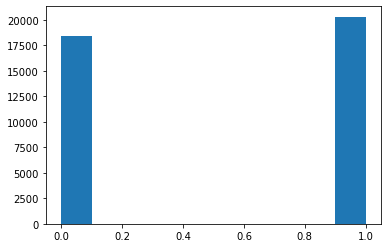

In [11]:
plt.hist(newdata['mean_vote_class'])
plt.show()

In [13]:
#from sklearn.decomposition import PCA
#pca01 = PCA(n_components = 4)
#principlecomp_train = pca01.fit_transform(newdata.drop(['movieId','mean_vote','mean_vote_class'],axis=1))
#pca01.explained_variance_ratio_

array([0.25157006, 0.20754751, 0.15368731, 0.14134908])

### Without Classing of mean_vote

In [150]:
target = newdata['mean_vote'] 
predictors = newdata.drop(['mean_vote','movieId','mean_vote_class'],axis=1)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.30, random_state=40)

In [164]:
model01 = Sequential()
model01.add(Dense(900, activation='relu', input_dim=9))
model01.add(Dense(600, activation='relu'))
model01.add(Dense(300, activation='relu'))
model01.add(Dense(150, activation='relu'))
model01.add(Dense(30, activation='relu'))
model01.add(Dense(1, activation='linear'))

# Compile the model
model01.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])

In [165]:
model01.fit(X_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
2711/2711 [==============================] - 18s 6ms/step - loss: 0.8146 - mean_squared_error: 1.1509
Epoch 2/20
2711/2711 [==============================] - 17s 6ms/step - loss: 0.7281 - mean_squared_error: 0.9020
Epoch 3/20
2711/2711 [==============================] - 17s 6ms/step - loss: 0.7150 - mean_squared_error: 0.8751
Epoch 4/20
2711/2711 [==============================] - 18s 7ms/step - loss: 0.7054 - mean_squared_error: 0.8538
Epoch 5/20
2711/2711 [==============================] - 17s 6ms/step - loss: 0.6961 - mean_squared_error: 0.8365
Epoch 6/20
2711/2711 [==============================] - 17s 6ms/step - loss: 0.6894 - mean_squared_error: 0.8225
Epoch 7/20
2711/2711 [==============================] - 18s 7ms/step - loss: 0.6847 - mean_squared_error: 0.8114
Epoch 8/20
2711/2711 [==============================] - 18s 7ms/step - loss: 0.6807 - mean_squared_error: 0.8056
Epoch 9/20
2711/2711 [==============================] - 17s 6ms/step - loss: 0.6758 - mean_squar

In [166]:
y_pred= model01.predict(X_test)

In [167]:
scores = model01.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores[1], 1 - scores[1]))    

Accuracy on test data: 0.7530362010002136% 
 Error on test data: 0.24696379899978638


In [168]:
print('MSE:',mean_squared_error(y_test, y_pred))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

MSE: 0.7530361842282577
MAE: 0.6566717493326821
RMSE: 0.8677765750631079


### With Classing mean_vote

In [60]:
target = newdata['mean_vote_class'] 
predictors = newdata.drop(['mean_vote','mean_vote_class','movieId'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.30, random_state=40)


In [96]:
model02 = Sequential()
model02.add(Dense(300, activation='relu', input_dim=9))
model02.add(Dense(150, activation='relu'))
model02.add(Dense(30, activation='relu'))
model02.add(Dense(1, activation='sigmoid'))

# Compile the model
model02.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_squared_error'])

In [97]:
model02.fit(X_train, y_train, epochs=20, batch_size=10)

Epoch 1/20
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3353 - mean_squared_error: 0.3154
Epoch 2/20
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3256 - mean_squared_error: 0.3211
Epoch 3/20
2711/2711 [==============================] - 4s 1ms/step - loss: 0.3231 - mean_squared_error: 0.3203
Epoch 4/20
2711/2711 [==============================] - 4s 1ms/step - loss: 0.3225 - mean_squared_error: 0.3202
Epoch 5/20
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3230 - mean_squared_error: 0.3216
Epoch 6/20
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3339 - mean_squared_error: 0.3327
Epoch 7/20
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3266 - mean_squared_error: 0.3255
Epoch 8/20
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3204 - mean_squared_error: 0.3194
Epoch 9/20
2711/2711 [==============================] - 3s 1ms/step - loss: 0.3232 - mean_squared_error:

In [98]:
y_pred = model02.predict(X_test)

In [99]:
scores = model02.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores[1], 1 - scores[1])) 

Accuracy on test data: 0.3232150077819824% 
 Error on test data: 0.6767849922180176


In [100]:
print('MSE:',mean_squared_error(y_test, y_pred))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))

MSE: 0.323215002587628
MAE: 0.3234071243378173
RMSE: 0.5685200107187327


### Generate Recommendation

In [177]:
import difflib
import random

def get_Movie_info(Movie_id):
    
    """
    Returns some basic information about a Movie given the Movie id and the metadata dataframe.
    """
    
    Movie_info = Movies_metadata[Movies_metadata['movieId'] == int(Movie_id)][['movieId', 'genres', 
                                                            'title', 'original_title', 'year', 'duration','mean_vote']]
    return Movie_info


def generate_recommendation(model,movieid):
    frames = pd.DataFrame()
    
    for i in movieid:
        mask = newdata[newdata.movieId.isin([i])]
        mask = mask.drop(['mean_vote','mean_vote_class','movieId'],axis=1)
        rating = model.predict(mask)
        tmp = get_Movie_info(i)
        tmp['pred_mean'] = rating
        frames = frames.append(tmp, ignore_index=True)

    return frames
#.sort_values('rating', ascending=False)

In [178]:
generate_recommendation(model01,[7,8,34,54,45,200,3948,193882])

,movieId,genres,title,original_title,year,duration,mean_vote,pred_mean
0,7,Comedy|Romance,Sabrina,Sabrina,1995,127,6.5,7.167579
1,8,Adventure|Children,Le avventure di Tom Sawyer e Huck Finn,Tom and Huck,1995,97,5.9,5.781286
2,34,Children|Drama,"Babe, maialino coraggioso",Babe,1995,91,7.0,6.740228
3,54,Children|Comedy,Una squadra di classe,The Big Green,1995,100,5.8,5.813876
4,45,Comedy|Drama|Thriller,Da morire,To Die For,1995,106,6.9,6.531688
5,200,Thriller,Legame mortale,The Tie That Binds,1995,99,5.2,5.866673
6,3948,Comedy,Ti presento i miei,Meet the Parents,2000,108,7.0,6.777590
7,193882,Adventure|Drama|Horror|Sci-Fi,Flora,Flora,2017,105,4.9,6.147355


In [179]:
generate_recommendation(model02,[7,8,34,54,45,200,3948,193882])

,movieId,genres,title,original_title,year,duration,mean_vote,pred_mean
0,7,Comedy|Romance,Sabrina,Sabrina,1995,127,6.5,1.0
1,8,Adventure|Children,Le avventure di Tom Sawyer e Huck Finn,Tom and Huck,1995,97,5.9,0.0
2,34,Children|Drama,"Babe, maialino coraggioso",Babe,1995,91,7.0,1.0
3,54,Children|Comedy,Una squadra di classe,The Big Green,1995,100,5.8,0.0
4,45,Comedy|Drama|Thriller,Da morire,To Die For,1995,106,6.9,1.0
5,200,Thriller,Legame mortale,The Tie That Binds,1995,99,5.2,0.0
6,3948,Comedy,Ti presento i miei,Meet the Parents,2000,108,7.0,1.0
7,193882,Adventure|Drama|Horror|Sci-Fi,Flora,Flora,2017,105,4.9,0.0
